In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [249]:
X_train = pd.read_csv("train_x.csv")
y_train = pd.read_csv("train_labels.csv")
X_test = pd.read_csv("test_x.csv")
y_test = pd.read_csv("test_labels.csv")

In [250]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

### I do not set class_weight='balanced' in both random forest and logistic regression models because by setting it all accuracies become lower. 

In [258]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

model.fit(X_train,y_train)

param_grid = {
                'n_estimators': [5, 10, 20, 30, 40, 50],
                'max_depth': [2, 7, 12, 17],
                'criterion': ["entropy"],
                'random_state': [0],
             }

grid_clf1 = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_clf1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [2, 7, 12, 17],
                         'n_estimators': [5, 10, 20, 30, 40, 50],
                         'random_state': [0]})

In [259]:
grid_clf1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=40,
                       random_state=0)

In [260]:
from sklearn.metrics import confusion_matrix,accuracy_score

pred=grid_clf1.best_estimator_.predict(X_test)
cm=confusion_matrix(y_test,pred)
AS=accuracy_score(y_test,pred)

print(cm)
print(AS)

[[162   0   0   0]
 [  2   4   1   0]
 [  2   2   2   0]
 [  1   1   2   5]]
0.9402173913043478


In [261]:
# Blood Donor/suspect Blood Donor accuracy = 100

# Hepatitis
4/7

0.5714285714285714

In [262]:
# Fibrosis
2/(2*3)

0.3333333333333333

In [263]:
# Cirrhosis

5/(4+5)

0.5555555555555556

### All above are accuracy

In [229]:
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1]+ cm[0,2]+cm[0,3])
print('Sensitivity for Blood Donor/suspect Blood Donor accuracy: ', sensitivity1)

specificity1 = (cm[1,1] + cm[1,2] + cm[1,3] + cm[2,1] + cm[2,2] + cm[2,3] + cm[3,1] + cm[3,2] + cm[3,3]) / (cm[1,1] + cm[1,2] + cm[1,3] + cm[2,1] + cm[2,2] + cm[2,3] + cm[3,1] + cm[3,2] + cm[3,3] + cm[1,0] + cm[2,0] + cm[3,0])
print('Specificity for Blood Donor/suspect Blood Donor accuracy: ', specificity1)

Sensitivity for Blood Donor/suspect Blood Donor accuracy:  1.0
Specificity for Blood Donor/suspect Blood Donor accuracy:  0.7727272727272727


In [230]:
sensitivity1 = cm[1,1]/(cm[1,1]+cm[1,0]+ cm[1,2]+cm[1,3])
print('Sensitivity for Hepatitis accuracy: ', sensitivity1)

specificity1 = (cm[0,0] + cm[0,2] + cm[0,3] + cm[2,0] + cm[2,2] + cm[2,3] + cm[3,0] + cm[3,2] + cm[3,3]) / ((cm[0,0] + cm[0,2] + cm[0,3] + cm[2,0] + cm[2,2] + cm[2,3] + cm[3,0] + cm[3,2] + cm[3,3]) + cm[0,1] + cm[2,1] + cm[3,1])
print('Specificity for Hepatitis accuracy: ', specificity1)

Sensitivity for Hepatitis accuracy:  0.5714285714285714
Specificity for Hepatitis accuracy:  0.9830508474576272


In [235]:
sensitivity1 = cm[2,2]/(cm[2,2]+cm[2,0]+ cm[2,1]+cm[2,3])
print('Sensitivity for Fibrosis accuracy: ', sensitivity1)

specificity1 = (cm[1,0] + cm[1,1] + cm[1,3] + cm[0,1] + cm[0,0] + cm[0,3] + cm[3,1] + cm[3,0] + cm[3,3]) / ((cm[1,0] + cm[1,1] + cm[1,3] + cm[0,1] + cm[0,0] + cm[0,3] + cm[3,1] + cm[3,0] + cm[3,3])+cm[0,2]+cm[1,2]+cm[3,2])
print('Specificity for Fibrosis accuracy: ', specificity1)

Sensitivity for Fibrosis accuracy:  0.3333333333333333
Specificity for Fibrosis accuracy:  0.9831460674157303


In [236]:
sensitivity1 = cm[3,3]/(cm[3,3]+cm[3,1]+ cm[3,2]+cm[3,0])
print('Sensitivity for Cirrhosis accuracy: ', sensitivity1)

specificity1 = (cm[0,0]+cm[0,1]+cm[0,2]+cm[1,0]+cm[1,1]+cm[1,2]+cm[2,0]+cm[2,1]+cm[2,2])/(cm[0,0]+cm[0,1]+cm[0,2]+cm[1,0]+cm[1,1]+cm[1,2]+cm[2,0]+cm[2,1]+cm[2,2]+cm[0,3]+cm[1,3]+cm[2,3])
print('Specificity for Cirrhosis accuracy: ', specificity1)

Sensitivity for Cirrhosis accuracy:  0.5555555555555556
Specificity for Cirrhosis accuracy:  1.0


In [208]:
# df = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
# df.rename(columns = {0: 'Level'}, inplace = True)
# df.head()

In [209]:
# df_0_X = df[df['Level'] == 0].drop(columns='Level')
# df_1_X = df[df['Level'] == 1].drop(columns='Level')
# df_2_X = df[df['Level'] == 2].drop(columns='Level')
# df_3_X = df[df['Level'] == 3].drop(columns='Level')


# df_0_y = df[df['Level'] == 0]["Level"]
# df_1_y = df[df['Level'] == 1]["Level"]
# df_2_y = df[df['Level'] == 2]["Level"]
# df_3_y = df[df['Level'] == 3]["Level"]

### I combine training and test datasets together below. I used the new dataset (training dataset combined with test dataset) to do 5-fold CV to compute the probability of positive class which is used to draw the ROC curve.

In [210]:
X = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
X.rename(columns = {0: 'Level'}, inplace = True)
Y = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
Y.rename(columns = {0: 'Level'}, inplace = True)
Z = pd.concat([X, Y], axis=0)
Z_y = Z["Level"]
Z_x = Z.drop(columns='Level')

In [211]:
Z_y_bool = Z_y == 3

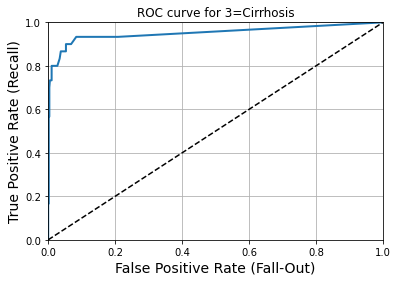

In [237]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict


y_probas_forest = cross_val_predict(grid_clf1.best_estimator_, Z_x.values, Z_y_bool, cv=5,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Z_y_bool, y_scores_forest)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=14) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=14)    # Not shown
    plt.grid(True)                                            # Not shown

plot_roc_curve(fpr_forest, tpr_forest)
plt.title("ROC curve for 3=Cirrhosis")
plt.show()

In [238]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Z_y_bool, y_scores_forest)

0.9512250712250712

In [239]:
Z_y_bool = Z_y == 2

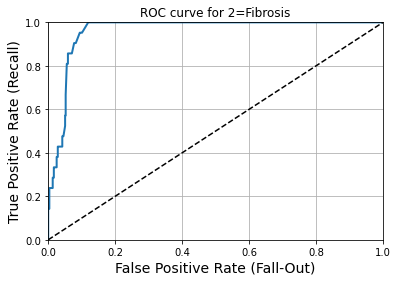

In [240]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict


y_probas_forest = cross_val_predict(grid_clf1.best_estimator_, Z_x.values, Z_y_bool, cv=5,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Z_y_bool, y_scores_forest)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=14) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=14)    # Not shown
    plt.grid(True)                                            # Not shown

plot_roc_curve(fpr_forest, tpr_forest)
plt.title("ROC curve for 2=Fibrosis")
plt.show()

In [241]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Z_y_bool, y_scores_forest)

0.9605178771845438

In [242]:
Z_y_bool = Z_y == 1

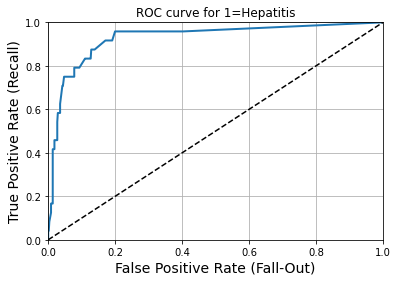

In [243]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict


y_probas_forest = cross_val_predict(grid_clf1.best_estimator_, Z_x.values, Z_y_bool, cv=5,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Z_y_bool, y_scores_forest)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=14) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=14)    # Not shown
    plt.grid(True)                                            # Not shown

plot_roc_curve(fpr_forest, tpr_forest)
plt.title("ROC curve for 1=Hepatitis")
plt.show()

In [244]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Z_y_bool, y_scores_forest)

0.9284757473209251

In [245]:
Z_y_bool = Z_y == 0

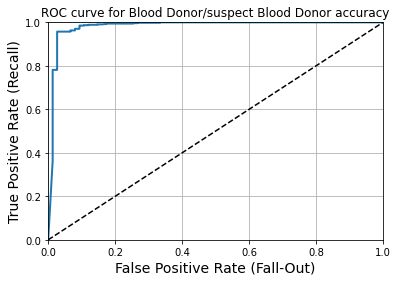

In [246]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict


y_probas_forest = cross_val_predict(grid_clf1.best_estimator_, Z_x.values, Z_y_bool, cv=5,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Z_y_bool, y_scores_forest)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=14) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=14)    # Not shown
    plt.grid(True)                                            # Not shown

plot_roc_curve(fpr_forest, tpr_forest)
plt.title("ROC curve for Blood Donor/suspect Blood Donor accuracy")
plt.show()

In [247]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Z_y_bool, y_scores_forest)

0.9820617283950616

### END of RF

In [272]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

LG = LogisticRegression(random_state=0, max_iter=10000)

LG.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [273]:
from sklearn.metrics import confusion_matrix,accuracy_score
model_LG= LG

pred_LG=model_LG.predict(X_test)
cm=confusion_matrix(y_test,pred_LG)
AS_LG=accuracy_score(y_test,pred_LG)

print(cm_LG)
print(AS_LG)

[[161   1   0   0]
 [  1   4   1   1]
 [  1   2   3   0]
 [  3   0   2   4]]
0.9347826086956522


In [274]:
# Blood Donor/suspect Blood Donor accuracy

161/162

0.9938271604938271

In [275]:
# Hepatitis

4/7

0.5714285714285714

In [276]:
# Fibrosis

3/6

0.5

In [277]:
# Cirrhosis

4/9

0.4444444444444444

### All above are accuracy

In [278]:
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1]+ cm[0,2]+cm[0,3])
print('Sensitivity for Blood Donor/suspect Blood Donor accuracy: ', sensitivity1)

specificity1 = (cm[1,1] + cm[1,2] + cm[1,3] + cm[2,1] + cm[2,2] + cm[2,3] + cm[3,1] + cm[3,2] + cm[3,3]) / (cm[1,1] + cm[1,2] + cm[1,3] + cm[2,1] + cm[2,2] + cm[2,3] + cm[3,1] + cm[3,2] + cm[3,3] + cm[1,0] + cm[2,0] + cm[3,0])
print('Specificity for Blood Donor/suspect Blood Donor accuracy: ', specificity1)

Sensitivity for Blood Donor/suspect Blood Donor accuracy:  0.9938271604938271
Specificity for Blood Donor/suspect Blood Donor accuracy:  0.7727272727272727


In [279]:
sensitivity1 = cm[1,1]/(cm[1,1]+cm[1,0]+ cm[1,2]+cm[1,3])
print('Sensitivity for Hepatitis accuracy: ', sensitivity1)

specificity1 = (cm[0,0] + cm[0,2] + cm[0,3] + cm[2,0] + cm[2,2] + cm[2,3] + cm[3,0] + cm[3,2] + cm[3,3]) / ((cm[0,0] + cm[0,2] + cm[0,3] + cm[2,0] + cm[2,2] + cm[2,3] + cm[3,0] + cm[3,2] + cm[3,3]) + cm[0,1] + cm[2,1] + cm[3,1])
print('Specificity for Hepatitis accuracy: ', specificity1)

Sensitivity for Hepatitis accuracy:  0.5714285714285714
Specificity for Hepatitis accuracy:  0.9830508474576272


In [280]:
sensitivity1 = cm[2,2]/(cm[2,2]+cm[2,0]+ cm[2,1]+cm[2,3])
print('Sensitivity for Fibrosis accuracy: ', sensitivity1)

specificity1 = (cm[1,0] + cm[1,1] + cm[1,3] + cm[0,1] + cm[0,0] + cm[0,3] + cm[3,1] + cm[3,0] + cm[3,3]) / ((cm[1,0] + cm[1,1] + cm[1,3] + cm[0,1] + cm[0,0] + cm[0,3] + cm[3,1] + cm[3,0] + cm[3,3])+cm[0,2]+cm[1,2]+cm[3,2])
print('Specificity for Fibrosis accuracy: ', specificity1)

Sensitivity for Fibrosis accuracy:  0.5
Specificity for Fibrosis accuracy:  0.9831460674157303


In [281]:
sensitivity1 = cm[3,3]/(cm[3,3]+cm[3,1]+ cm[3,2]+cm[3,0])
print('Sensitivity for Cirrhosis accuracy: ', sensitivity1)

specificity1 = (cm[0,0]+cm[0,1]+cm[0,2]+cm[1,0]+cm[1,1]+cm[1,2]+cm[2,0]+cm[2,1]+cm[2,2])/(cm[0,0]+cm[0,1]+cm[0,2]+cm[1,0]+cm[1,1]+cm[1,2]+cm[2,0]+cm[2,1]+cm[2,2]+cm[0,3]+cm[1,3]+cm[2,3])
print('Specificity for Cirrhosis accuracy: ', specificity1)

Sensitivity for Cirrhosis accuracy:  0.4444444444444444
Specificity for Cirrhosis accuracy:  0.9942857142857143


In [282]:
Z_y_bool = Z_y == 3

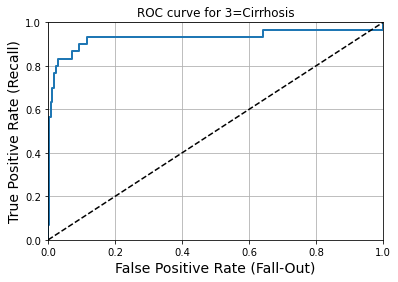

In [283]:
y_probas = cross_val_predict(model_LG, Z_x.values, Z_y_bool, cv=5,
                                    method="predict_proba")

y_scores = y_probas[:, 1] # score = proba of positive class
fpr, tpr, thresholds = roc_curve(Z_y_bool, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=14) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=14)    # Not shown
    plt.grid(True)                                            # Not shown

plot_roc_curve(fpr, tpr)
plt.title("ROC curve for 3=Cirrhosis")
plt.show()

In [284]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Z_y_bool, y_scores)

0.930940170940171

In [285]:
Z_y_bool = Z_y == 2

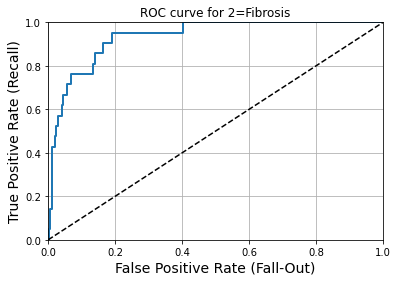

In [286]:
y_probas = cross_val_predict(model_LG, Z_x.values, Z_y_bool, cv=5,
                                    method="predict_proba")

y_scores = y_probas[:, 1] # score = proba of positive class
fpr, tpr, thresholds = roc_curve(Z_y_bool, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=14) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=14)    # Not shown
    plt.grid(True)                                            # Not shown

plot_roc_curve(fpr, tpr)
plt.title("ROC curve for 2=Fibrosis")
plt.show()

In [287]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Z_y_bool, y_scores)

0.9333012666346001

In [288]:
Z_y_bool = Z_y == 1

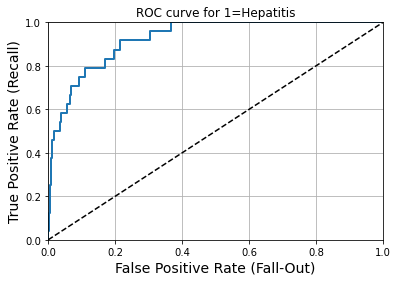

In [289]:
y_probas = cross_val_predict(model_LG, Z_x.values, Z_y_bool, cv=5,
                                    method="predict_proba")

y_scores = y_probas[:, 1] # score = proba of positive class
fpr, tpr, thresholds = roc_curve(Z_y_bool, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=14) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=14)    # Not shown
    plt.grid(True)                                            # Not shown

plot_roc_curve(fpr, tpr)
plt.title("ROC curve for 1=Hepatitis")
plt.show()

In [290]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Z_y_bool, y_scores)

0.9249153976311337

In [291]:
Z_y_bool = Z_y == 0

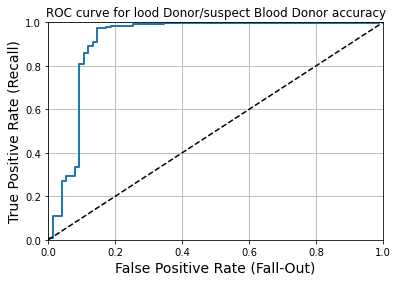

In [292]:
y_probas = cross_val_predict(model_LG, Z_x.values, Z_y_bool, cv=5,
                                    method="predict_proba")

y_scores = y_probas[:, 1] # score = proba of positive class
fpr, tpr, thresholds = roc_curve(Z_y_bool, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=14) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=14)    # Not shown
    plt.grid(True)                                            # Not shown

plot_roc_curve(fpr, tpr)
plt.title("ROC curve for lood Donor/suspect Blood Donor accuracy")
plt.show()

In [293]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Z_y_bool, y_scores)

0.9140246913580247

## END

In [48]:
# import pandas as pd

In [49]:
# hcv = pd.read_csv("HCV-Egy-Data.csv")
# hcv

We can see that there are 1385 observations and 29 variables in this dataset.

In [50]:
# hcv.info()

We can see that there is no missing value in this dataset and all variables are numerical (not categorical).

In [51]:
# hcv['Baselinehistological staging'].value_counts(normalize = True)

I randomly assign 80% of the dataset into training dataset and the rest of the dataset into test dataset. 

In [52]:
# from sklearn.model_selection import StratifiedShuffleSplit

# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
# for train_index, test_index in sss.split(hcv, hcv['Baselinehistological staging']):
#     hcv_train_set = hcv.iloc[hcv.index.intersection(train_index)]
#     hcv_test_set = hcv.iloc[hcv.index.intersection(test_index)]

In [53]:
# hcv_train_set.shape,hcv_test_set.shape

In [54]:
# hcv_train_set['Baselinehistological staging'].value_counts(normalize = True)

In [55]:
# hcv_test_set['Baselinehistological staging'].value_counts(normalize = True)

In [56]:
# hcv_train_X = hcv_train_set.drop('Baselinehistological staging',axis=1)
# hcv_train_y = hcv_train_set['Baselinehistological staging'].copy()
# hcv_test_X = hcv_test_set.drop('Baselinehistological staging',axis=1)
# hcv_test_y = hcv_test_set[['Baselinehistological staging']].copy()

In [57]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split


# model = RandomForestClassifier(n_estimators=45,
#                        random_state=seed, 
#                        criterion='entropy',
#                        max_depth=5, 
#                        min_samples_split=2)

# model.fit(hcv_train_X, hcv_train_y)

# y_pred = model.predict(hcv_test_X)

# # evaluate predictions
# accuracy = model.score(hcv_test_X, hcv_test_y)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [58]:
# print(confusion_matrix(hcv_test_y, y_pred))